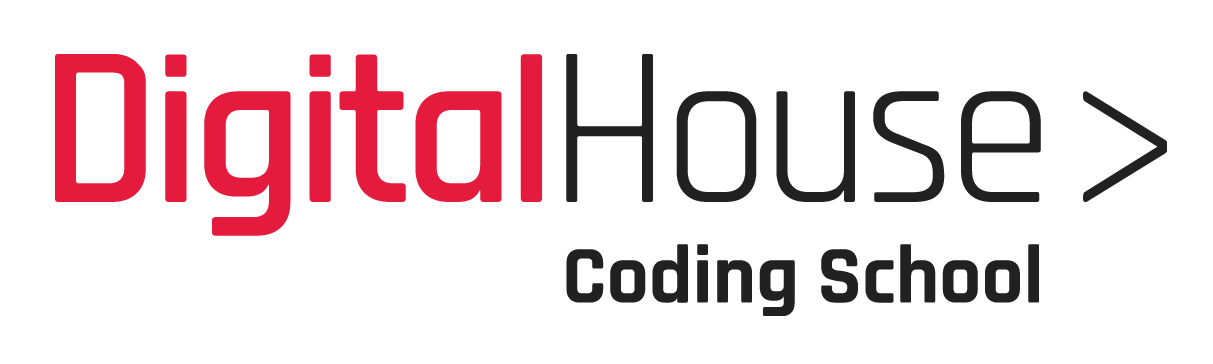

# UTILIZAÇÃO DE UMA API CRIADA COM O FLASK, LOCALMENTE

## Criação do Modelo que iremos implementar como uma API
Iremos inicialmente implementar o modelo localmente e posteriormente em um webservice com o tradicional Titanic Survivors Dataset. :)

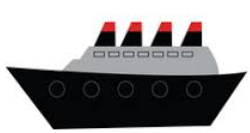

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [8]:
# create df
train = pd.read_csv('titanic.csv')

# drop null values
train.dropna(inplace=True)

# features and target
target = 'Survived'
features = ['Pclass', 'Age', 'SibSp', 'Fare']

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


(array([158.,   0.,   0.,   0.,   0.,  15.,   0.,   0.,   0.,  10.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

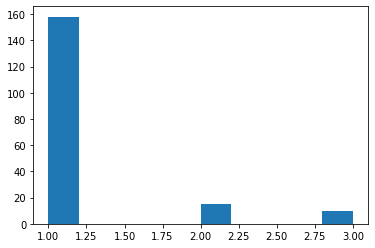

In [4]:
plt.hist(train['Pclass'])

(array([10.,  6., 32., 30., 40., 24., 23., 13.,  4.,  1.]),
 array([ 0.92 ,  8.828, 16.736, 24.644, 32.552, 40.46 , 48.368, 56.276,
        64.184, 72.092, 80.   ]),
 <BarContainer object of 10 artists>)

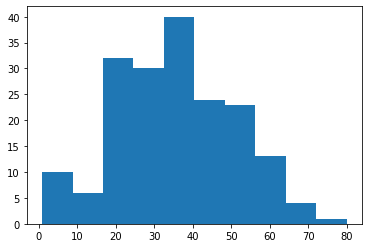

In [5]:
plt.hist(train['Age'])

(array([110.,   0.,   0.,  64.,   0.,   0.,   6.,   0.,   0.,   3.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

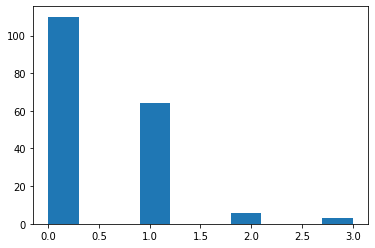

In [6]:
# SibSp = (number of siblings on board) / (number of spouse on board)
plt.hist(train['SibSp'])

(array([72., 70., 24.,  1.,  8.,  6.,  0.,  0.,  0.,  2.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

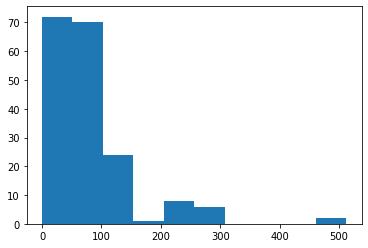

In [7]:
plt.hist(train['Fare'])

In [9]:
# X matrix, y vector
X = train[features]
y = train[target]

In [9]:
# Vamos utilizar o Random Forest
model = RandomForestClassifier(max_depth=10, random_state=0)
model.fit(X, y)
model.score(X,y)

0.9836065573770492

In [12]:
y.unique()

array([1, 0])

In [10]:

# parâmetros de entrada:
classe = 1
idade = 20
qtdParentes = 2
passagem = 200


# dados da chamada ao serviço
data = {'Pclass': classe, 'Age': idade, 'SibSp': qtdParentes, 'Fare': passagem}
data.update((x, [y]) for x, y in data.items())
data_df = pd.DataFrame.from_dict(data)
# resultado do modelo - 0 - não sobreviveu / 1 - sobreviveu
result = model.predict(data_df)
print(result)

[1]


## Persistência do Modelo com o Pickle

In [14]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

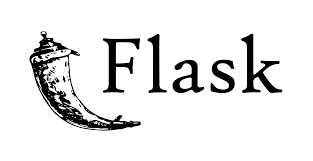


## Agora vamos analisar o arquivo "api_titanic.py", disponibilizado junto com o material

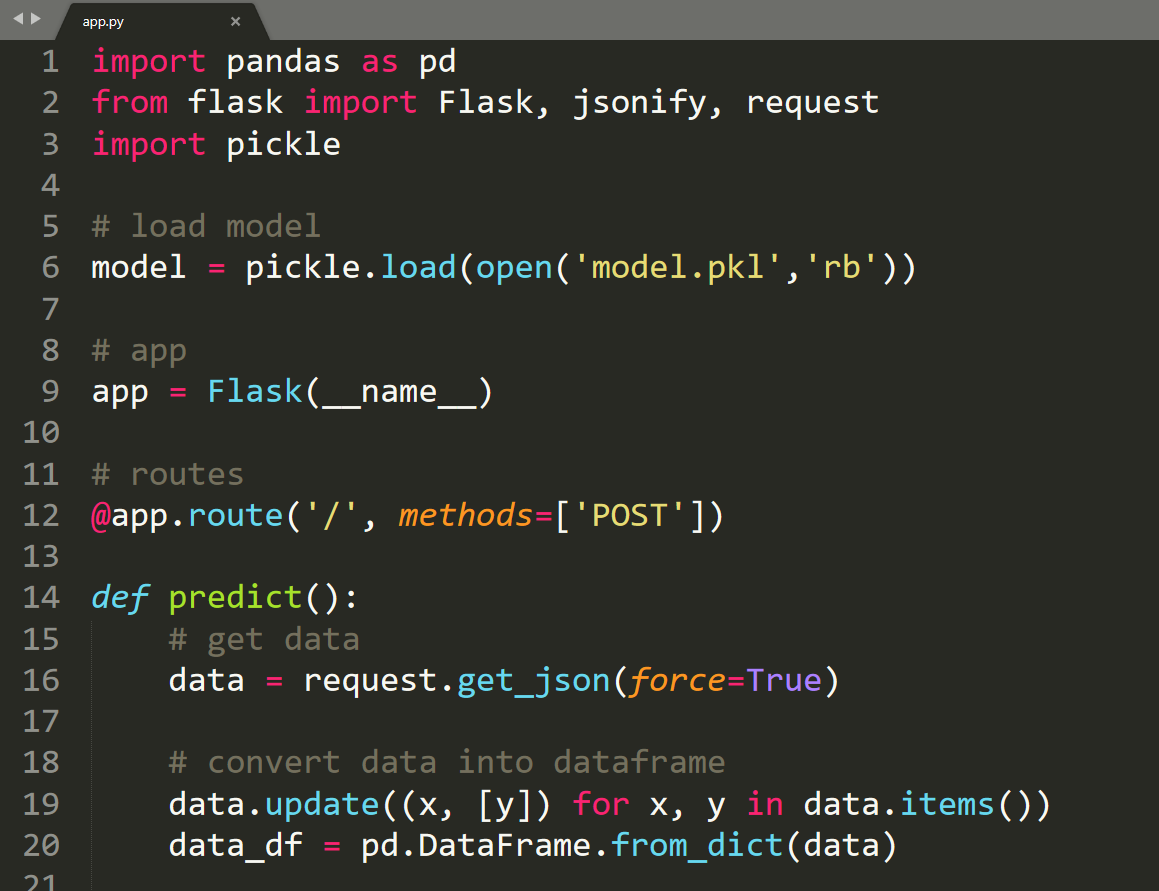

## Teste Local com o Flask
Executar o script app.py pelo prompt para disponibilizar o serviço localmente  

In [1]:
import requests
import json

In [13]:
# url local - definida no app.py - executada pelo Flask
url = 'http://127.0.0.1:5000'

# parâmetros de entrada:
classe      = 1
idade       = 90
qtdParentes = 2
passagem    = 200


# dados da chamada ao serviço
data = {'Pclass': classe, 'Age': idade, 'SibSp': qtdParentes, 'Fare': passagem}

data = json.dumps(data)
data

'{"Pclass": 1, "Age": 90, "SibSp": 2, "Fare": 200}'

In [14]:
# chamada do serviço com o método POST
send_request = requests.post(url, data)
print(send_request.json())

{'results': {'results': 0}}


In [43]:
test_df = pd.read_csv('titanic/train.csv')
test_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
import os
os.listdir('titanic/')

['train.csv', 'gender_submission.csv', 'test.csv']